In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import RcParams

# plt.rcParams['figure.figsize'] =[12, 8]

In [6]:
# coefficients of fit equation from NIST
a = -4.1236
b = 13.788
c = -26.068
d = 26.272
e = -14.663
f = 4.4954
g = -0.6905
h = 0.0397
coefficients = [a, b, c, d, e, f, g, h]

In [23]:
# generate the NIST curve fit equation
def thermal_conductivity(temp, coefficients):
    log_k = 0.
    for n in range(len(coefficients)):
        log_k += coefficients[n]*(np.power(np.log10(temp), n))
    return np.power(10, log_k)

In [17]:
temps = np.linspace(1, 400, 400)
ks = []
for t in temps:
    ks.append(thermal_conductivity(t, coefficients))

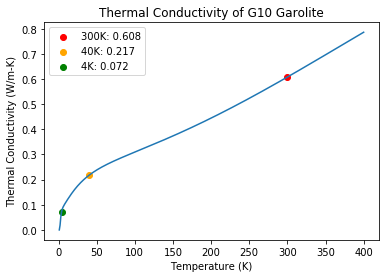

In [36]:
plt.scatter(temps[299], ks[299], marker='o', color='red', label= '300K: ' + str(np.round(ks[299], 3)))
plt.scatter(temps[39], ks[39], marker='o', color='orange', label= '40K: ' + str(np.round(ks[39], 3)))
plt.scatter(temps[3], ks[3], marker='o', color='green', label= '4K: ' + str(np.round(ks[3], 3)))
plt.plot(temps, ks)
plt.xlabel('Temperature (K)')
plt.ylabel('Thermal Conductivity (W/m-K)')
plt.legend()
plt.title('Thermal Conductivity of G10 Garolite')
plt.savefig('C:\\Users\jemoor15\Desktop\ThermalConductivity.pdf')

In [38]:
thicknesses = [1/32., 1/16., 3/32., 1/8., 3/16., 1/4., 3/8., 1/2., 5/8., 3/4., 1., 5/4., 3/2., 2.] # in
w = 0.88 # in
l = 4.00 # in
gs = []
for t in thicknesses:
    g = (w*t/4.00)
    gs.append(g)

In [63]:
def get_q(ks, t1, t2, g):
    k = np.average(ks[t1-1:t2])
    q = k*(t2-t1)*g
    return q

In [84]:
qs4 = []
for g in gs:
    qs4.append(get_q(ks, 4, 40, g))
qs40 = []
for g in gs:
    qs40.append(get_q(ks, 40, 300, g))

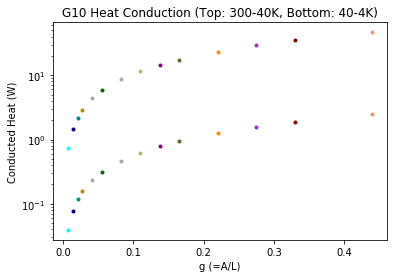

In [122]:
for t in range(len(thicknesses)):
    plt.semilogy(gs[t], qs4[t], marker='.', color=list(colors.keys())[t+28])
    plt.semilogy(gs[t], qs40[t], marker='.', color=list(colors.keys())[t+28])
plt.ylabel('Conducted Heat (W)')
plt.xlabel('g (=A/L)')
plt.title('G10 Heat Conduction (Top: 300-40K, Bottom: 40-4K)')
plt.savefig('C:\\Users\jemoor15\Desktop\HeatConduction.pdf')
# plt.legend(ncol=2, loc='best')
# plt.tight_layout()

Text(0.5, 1.0, 'G10 Heat Conduction (300K-40K)')

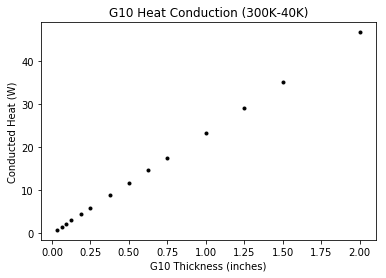

In [67]:
plt.ylabel('Conducted Heat (W)')
plt.xlabel('G10 Thickness (inches)')
plt.title('G10 Heat Conduction (300K-40K)')

In [92]:
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]


In [114]:
list(colors.keys())

['b',
 'g',
 'r',
 'c',
 'm',
 'y',
 'k',
 'w',
 'aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'green',
 'greenyellow',
 'grey',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'ligh

In [111]:
len(thicknesses)

14